In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Tools
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [33]:
df = pd.read_csv('Cleaned_BA_reviews.csv')

In [34]:
df.head()

,Unnamed: 0,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,reviews,stars,date,country,verified
0,0,Solo Leisure,Business Class,Riga to London,4.0,5.0,5.000000,4.0,5,1,crew amazing attentive nothing missed definite...,5,2024-08-07,United Kingdom,True
1,1,Solo Leisure,Economy Class,Rome to Philadelphia via London,3.0,3.0,2.707815,1.0,1,0,flew internationally first time life delay end...,10,2024-08-05,United States,False
2,2,Business,Economy Class,London to Bologna,3.0,1.0,1.000000,1.0,1,0,ba subsequent delay postponed departure time i...,1,2024-08-03,Italy,True
3,3,Business,Business Class,Sydney to London,1.0,3.0,3.000000,1.0,1,0,embarrassing word british attached airline ser...,1,2024-08-02,Australia,False
4,4,Solo Leisure,Business Class,Dublin to London Heathrow,3.0,5.0,4.000000,5.0,4,1,flight cancelled due bad weather ba contacted ...,1,2024-08-02,United Kingdom,True


In [35]:
!pip install vaderSentiment

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['reviews'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head() 


,Unnamed: 0,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,reviews,stars,date,country,verified,Sentiment,Analysis
0,0,Solo Leisure,Business Class,Riga to London,4.0,5.0,5.000000,4.0,5,1,crew amazing attentive nothing missed definite...,5,2024-08-07,United Kingdom,True,0.8941,Positive
1,1,Solo Leisure,Economy Class,Rome to Philadelphia via London,3.0,3.0,2.707815,1.0,1,0,flew internationally first time life delay end...,10,2024-08-05,United States,False,-0.9127,Negative
2,2,Business,Economy Class,London to Bologna,3.0,1.0,1.000000,1.0,1,0,ba subsequent delay postponed departure time i...,1,2024-08-03,Italy,True,-0.9732,Negative
3,3,Business,Business Class,Sydney to London,1.0,3.0,3.000000,1.0,1,0,embarrassing word british attached airline ser...,1,2024-08-02,Australia,False,-0.1336,Negative
4,4,Solo Leisure,Business Class,Dublin to London Heathrow,3.0,5.0,4.000000,5.0,4,1,flight cancelled due bad weather ba contacted ...,1,2024-08-02,United Kingdom,True,0.1779,Neutral


In [37]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    1614
Negative    1117
Neutral      326
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21b8f339bd0>,
 [Text(-0.09652817472452449, 1.0957565019128803, 'Positive'),
  Text(-0.26911122172187885, -1.0665735559929086, 'Negative'),
  Text(1.2749445362018126, -0.4438653282349785, 'Neutral')],
 [Text(-0.05265173166792244, 0.5976853646797528, '52.8%'),
  Text(-0.1467879391210248, -0.5817673941779501, '36.5%'),
  Text(0.8027428561270671, -0.2794707622220235, '10.7%')])

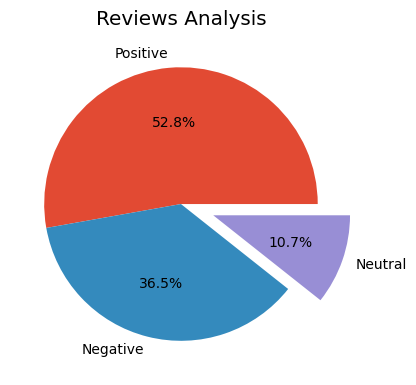

In [38]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

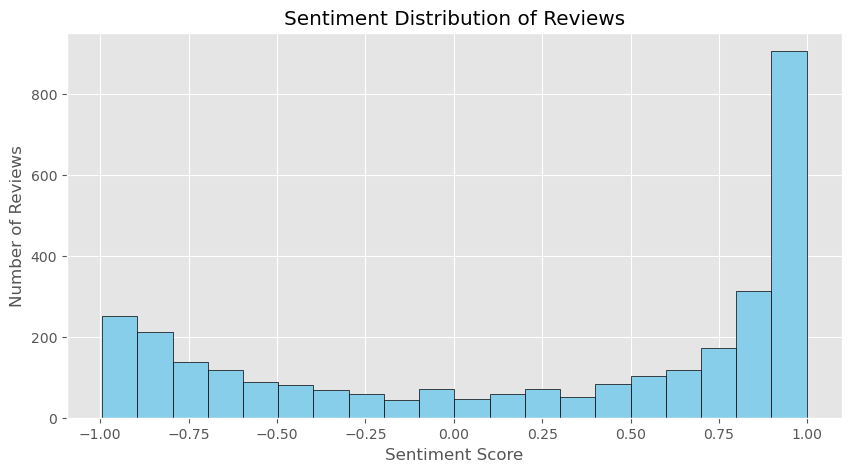

In [39]:
plt.figure(figsize=(10, 5))
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.savefig('data/sentiment_distribution.png')
plt.show()

In [40]:
# Importing random number module
import random

# Creating rabdom list of numbers
review_numbers = []
n=10
for i in range(n):
    review_numbers.append(random.randint(1, 3000))
    
#Print
for i in review_numbers:
    print(df['reviews'][i])
    print(df['Analysis'][i])

really enjoyed flight london johannesburg aircraft comfortable crew friendly polite inflight entertainment wide selection food ok nothing get excited eat though grown older found long haul flight le tolerable really looking forward flight however pleasantly surprised definitely use british airway route
Positive
verified review bari gatwick held together cockpit crew follows review outbound leg week back check excellent ba staff security bari breeze boarding well organised cabin crew chatting boarded ignored inexcusable flight fine ahead schedule good update cockpit didnt buy anything time smell coffee far better taste previous experience gatwick south unpleasant tho ba fault endless staircase broken escalator long walk security half egates action baggage hadnt arrived anyway despite priority delay security irrelevant offer upgrade club joke lounge bari onboard value max still like flying ba much dont easy ryanair sinking level put ba business short haul little differentiator
Positive
v

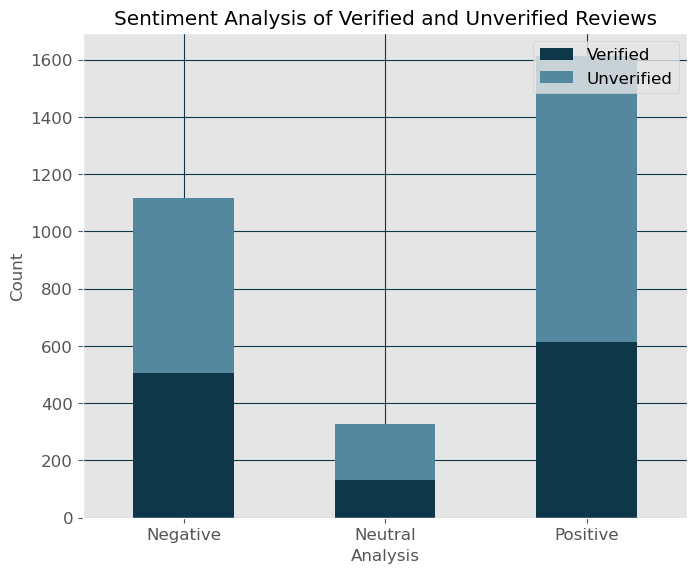

In [41]:
# Pivot the DataFrame for a stacked bar plot
pivot_df = df.pivot_table(index='Analysis', columns='verified', aggfunc='size', fill_value=0)
pivot_df
# Changing the order for a better appearance
ordered_pivot_df = pd.DataFrame({
    'Verified': pivot_df[True],
    'Unverified': pivot_df[False]
}).fillna(0)

# Plot a stacked bar chart with the desired order
ordered_pivot_df.plot(kind='bar', stacked=True, figsize=(7.8, 6.3), color=["#0e3849", "#54889f"])

# Chnaging grid colour
plt.grid(color='#0e3849')

# Customize legend labels
plt.legend(['Verified', 'Unverified'], loc='upper right', fontsize=12)

# Add titles and labels
plt.title('Sentiment Analysis of Verified and Unverified Reviews')
plt.xlabel('Analysis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Save plot as file 
plt.savefig('verified_review_count.png', transparent=True)

# Display the plot
plt.show()

In [42]:
pivot_df

verified,False,True
Analysis,,
Negative,613,504
Neutral,194,132
Positive,1000,614


## Wordcloud

In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud 

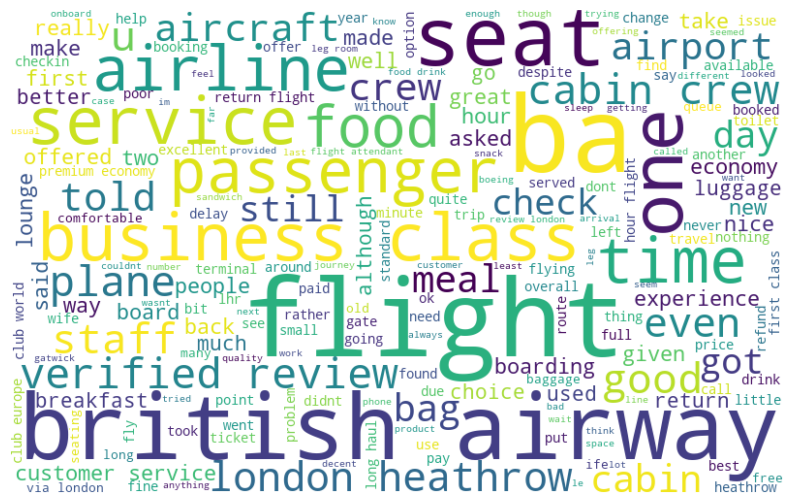

In [45]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

def show_wordcloud(data):
    wordcloud = WordCloud(
        width = 800, height = 500,
        background_color='white',
        random_state=21,
        max_font_size=110)

    wordcloud=wordcloud.generate(data) 

    plt.figure(figsize=(10, 7))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

# show_wordcloud(df.reviews) 
show_wordcloud(unique_string)

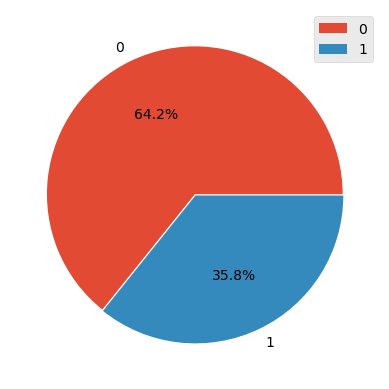

In [46]:
# Satisfaction of customer
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], explode=(0, 0.01), autopct='%1.1f%%', shadow=False)
plt.legend()
plt.show() 

In [47]:
soc

,Recommended,reviews
0,0,1964
1,1,1093


In [48]:
df = df.reset_index(drop=True)

In [49]:
df.head()

,Unnamed: 0,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,reviews,stars,date,country,verified,Sentiment,Analysis
0,0,Solo Leisure,Business Class,Riga to London,4.0,5.0,5.000000,4.0,5,1,crew amazing attentive nothing missed definite...,5,2024-08-07,United Kingdom,True,0.8941,Positive
1,1,Solo Leisure,Economy Class,Rome to Philadelphia via London,3.0,3.0,2.707815,1.0,1,0,flew internationally first time life delay end...,10,2024-08-05,United States,False,-0.9127,Negative
2,2,Business,Economy Class,London to Bologna,3.0,1.0,1.000000,1.0,1,0,ba subsequent delay postponed departure time i...,1,2024-08-03,Italy,True,-0.9732,Negative
3,3,Business,Business Class,Sydney to London,1.0,3.0,3.000000,1.0,1,0,embarrassing word british attached airline ser...,1,2024-08-02,Australia,False,-0.1336,Negative
4,4,Solo Leisure,Business Class,Dublin to London Heathrow,3.0,5.0,4.000000,5.0,4,1,flight cancelled due bad weather ba contacted ...,1,2024-08-02,United Kingdom,True,0.1779,Neutral


In [50]:
# What is the average overall rating given for British Airways?
df.stars.mean()

4.384036637226038

Text(0.5, 0.98, 'Counts for each ratings')

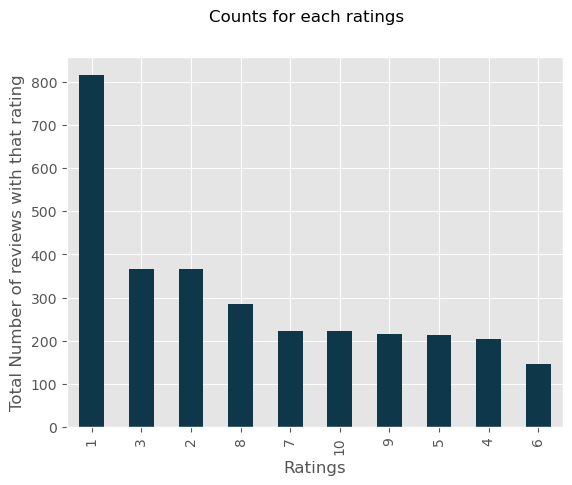

In [51]:
# What is the total counts for each ratings?
df.stars.value_counts().plot(kind="bar",color=["#0e3849"])
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

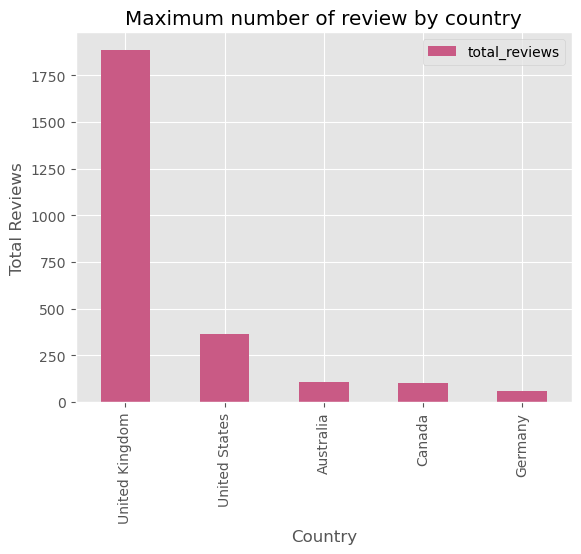

In [52]:
# Which country most review comes from?
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'count':'total_reviews'}, inplace=True)
df_country_review.plot(kind="bar", x='country', y='total_reviews', color='#c95a85')
plt.title("Maximum number of review by country")
plt.xlabel("Country")
plt.ylabel("Total Reviews")
plt.show()

In [53]:
df_country_review

,country,total_reviews
0,United Kingdom,1886
1,United States,365
2,Australia,110
3,Canada,103
4,Germany,62


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

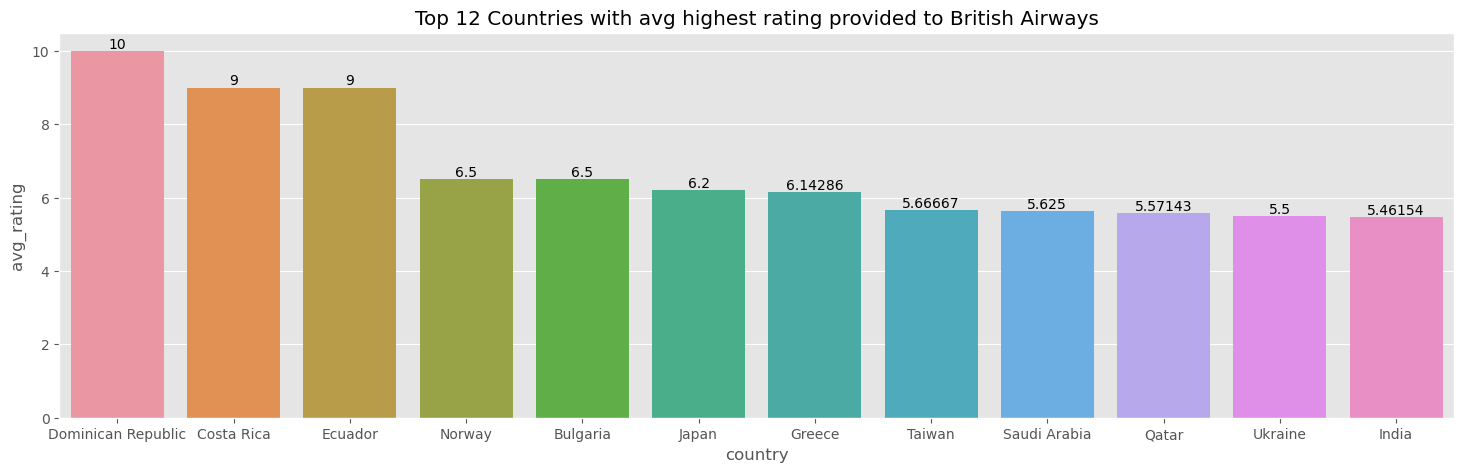

In [54]:
# Which country provided on average highest ratings?
df_country_rating = pd.DataFrame(df.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [55]:
pd.DataFrame(df.groupby('country')['stars'].mean())

,stars
country,
Argentina,3.600000
Australia,4.154545
Austria,3.666667
Bahrain,1.000000
Belgium,3.500000
...,...
Ukraine,5.500000
United Arab Emirates,5.000000
United Kingdom,4.414104


In [56]:
 df.to_csv('Cleaned_sentiment_BA_reviews.csv')